In [632]:
from defprojetmlfootball import *
import matplotlib.pyplot as plt
from pylab import *
import os
import numpy as np
import pandas as pd

# Partie 1 : Analyse Exploratoire des données

In [633]:
df=createdataframe(evenements(matchescoupedumonde()))
df.columns

C:\Users\sebas\Documents\4e année GMM\Projet-MLFootball-master\defprojetmlfootball.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["outcome"]=df_to_study["shot"].map(lambda x : x["outcome"]["name"])
C:\Users\sebas\Documents\4e année GMM\Projet-MLFootball-master\defprojetmlfootball.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["technic"]=df_to_study["shot"].map(lambda x : x["technique"]["name"])
C:\Users\sebas\Documents\4e année GMM\Projet-MLFootball-master\defprojetmlfootball.py:135: SettingWithCopyWarn

Index(['play_pattern', 'period', 'location', 'timestamp', 'outcome', 'technic',
       'environnement', 'statbomb', '1V1', 'post', 'circle5', 'circle10',
       'ratio', 'team', 'opponents', 'shooting_angle', 'distance'],
      dtype='object')

## Répartition des "resultats" des tirs

In [634]:
df["outcome"].value_counts()   

Off T      572
Blocked    459
Saved      341
Goal       183
Wayward    127
Post        24
Name: outcome, dtype: int64

Off T: la trajectoire initiale est hors des cages
Blocked: arrété par la défense 
Saved: Arrété par le goal
Goal: le tir a résulté en un but accordé par l'arbitre
Wayward:tir raté: soit pas assez de puissance soit le joueur a manqué le ballon soit complétement non cadré
Post: Le tir a touché un poteau ou la barre transversale

In [635]:
df["outcome"].describe()

count      1706
unique        6
top       Off T
freq        572
Name: outcome, dtype: object

Il y a 1706 tirs pendant la coupe du monde. Les résultats de ces tirs peuvent prendre 6 modalités (voir ci-dessus). La plus fréquente étant un tir non cadré.

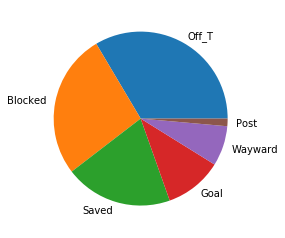

In [636]:
labels="Off_T","Blocked","Saved","Goal","Wayward","Post"
plt.pie(df["outcome"].value_counts(), labels=labels)
plt.show()

Diagramme de la répartition des évènements "résultat du tir", la majeur partie est arrêtée ou hors cadre ou encore sauvée par le gardien.

## Boxplot ou histogramme des variables quantitatives indépendemment du résultat du tir

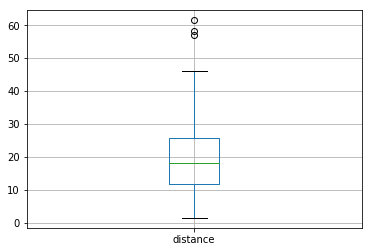

In [637]:
df.boxplot('distance')

La distance médianne est proche de 20m (50% des tirs sont frappés a plus de 20m des cages et 50% à moins) et les valeurs sont comprises entre 1m et 45m si on enlève les outliers. Les tirs sont tentés d'assez près ce qui est logique.

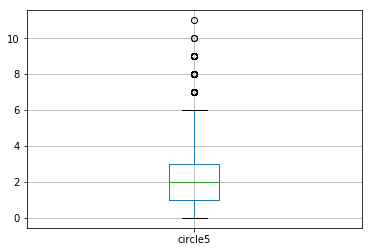

In [638]:
df["circle5"]=pd.to_numeric(df["circle5"])
df.boxplot('circle5')

50% des tirs sont effectués avec plus de 2 joueurs dans un rayon de 5 m autour du porteur du ballon. Les valeurs sont en général assez faibles. Les tireurs ont tendance à tenter leur chance quand ils ont de l'espace.

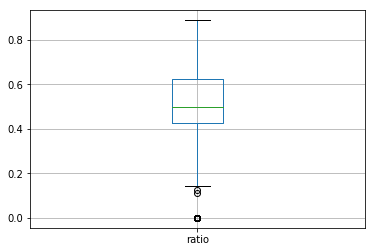

In [639]:
df["ratio"]=pd.to_numeric(df["ratio"])
df["opponents"]=pd.to_numeric(df["opponents"])
df["team"]=pd.to_numeric(df["team"])

df.boxplot('ratio')

Les valeurs prises par la variable ratio sont en général situées entre 0.4 et 0.6. Le ratio étant calculé avec le rapport de la varibale equipe sur la variable adversaires, on peut dire qu'il y a en general environ deux fois plus de joueurs de l'équipe adverse au tireur à côté du tireur que de coéquipiers à lui.

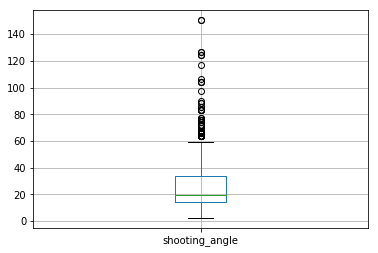

In [640]:
df.boxplot('shooting_angle')

La médiane des angles de tir se situe à 20 degrés. Cependant on observe beaucoup d'outliers, en effet meme si la plupart des tirs sont entre 1 et 60°, il n'est pas rare d'avoir des tirs avec des angles plus ouverts (si le tireur est proche et en face par exemple). Ces tirs correspondent sûrement aux buts.

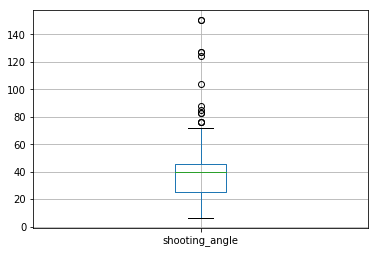

In [641]:
df[df["outcome"]=="Goal"].boxplot('shooting_angle')

En effet, la médiane des angles de tir lorsqu'il y a but est bien plus élevé, les buts sont donc souvent des outliers du précédent boxplot.

## Analyse des variables pertinentes en fonction du "résultat" du tir. 

In [642]:
df["goal"]=df["outcome"]=="Goal"
df

,play_pattern,period,location,timestamp,outcome,technic,environnement,statbomb,1V1,post,circle5,circle10,ratio,team,opponents,shooting_angle,distance,goal
16,Regular Play,1,"[89.0, 60.0]",00:00:12.952,Off T,Normal,"[{'location': [101.0, 31.0], 'player': {'id': ...",0.011937,False,Right Wing,0,3,0.555556,5,9,10.447233,36.891733,False
226,From Goal Kick,1,"[103.0, 22.0]",00:06:49.112,Saved,Normal,"[{'location': [120.0, 39.0], 'player': {'id': ...",0.021325,False,Left Wing,1,2,0.375000,3,8,12.833300,24.758837,False
244,From Keeper,1,"[108.0, 56.0]",00:07:18.592,Off T,Half Volley,"[{'location': [117.0, 42.0], 'player': {'id': ...",0.046489,False,Right Center Forward,0,1,0.000000,0,6,14.036243,20.000000,False
256,Regular Play,1,"[104.0, 41.0]",00:07:58.592,Blocked,Normal,"[{'location': [102.0, 42.0], 'player': {'id': ...",0.161346,False,Right Center Forward,1,3,0.500000,3,6,27.973680,16.031220,False
262,Regular Play,1,"[101.0, 41.0]",00:08:04.072,Off T,Volley,"[{'location': [102.0, 39.0], 'player': {'id': ...",0.074833,False,Left Center Midfield,2,9,0.571429,4,7,23.716189,19.026298,False
425,Regular Play,1,"[93.0, 50.0]",00:13:16.032,Wayward,Volley,"[{'location': [102.0, 46.0], 'player': {'id': ...",0.024178,False,Right Back,0,2,0.625000,5,8,14.878768,28.792360,False
748,Regular Play,1,"[112.0, 51.0]",00:23:19.112,Off T,Normal,"[{'location': [112.0, 39.0], 'player': {'id': ...",0.040939,False,Left Wing,1,3,0.375000,3,8,20.741588,13.601471,False
896,From Throw In,1,"[108.0, 49.0]",00:27:54.352,Saved,Half Volley,"[{'location': [109.0, 48.0], 'player': {'id': ...",0.056088,False,Right Center Forward,1,5,0.428571,3,7,24.670745,15.000000,False
1018,Regular Play,1,"[81.0, 48.0]",00:33:12.952,Off T,Normal,"[{'location': [99.0, 34.0], 'player': {'id': 5...",0.012456,False,Left Center Midfield,0,2,0.600000,6,10,11.246715,39.812058,False
1068,From Corner,1,"[98.0, 60.0]",00:35:47.112,Blocked,Normal,"[{'location': [88.0, 32.0], 'player': {'id': 3...",0.011336,False,Right Wing,0,2,0.700000,7,10,11.462180,29.732137,False


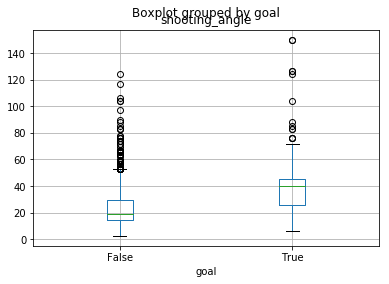

In [643]:
df.boxplot(column="shooting_angle",by="goal")

Ce boxplot nous permet de constater que l'angle médian des buts se situe à 40° et que pour les tirs qui ne finissent pas en but les angles sont en genral moins ouverts.

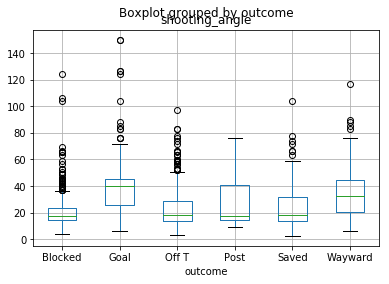

In [644]:
df.boxplot(column="shooting_angle",by="outcome")
plt.show()

Ce boxplot nous permet de constater que l'angle médian des buts se situe à 40° et que pour tous les autres résultats de tirs les angles sont en général moinss ouverts.



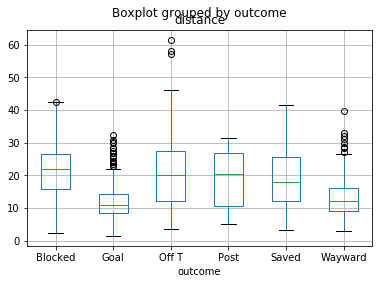

In [645]:
df.boxplot(column="distance",by="outcome")
plt.show()

On peut remarquer que la distance influe sur les buts car plus le tireur est près plus il marque et plus il est loin plus ses tirs sont arrêtés ou sauvés

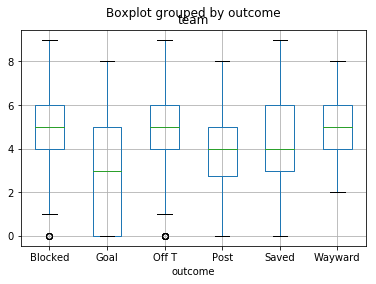

In [646]:
df.boxplot(column="team",by='outcome')
plt.show()

D'après ce boxplot il semblerait que moins le tireur à d'equipiers devant lui plus il marque. Cela semble logique car dans une phase offensive l'equipe attaquante est souvent en en sous nombre et plus le joueur et proche du but moins il a de chance d'être derrière un equipier.



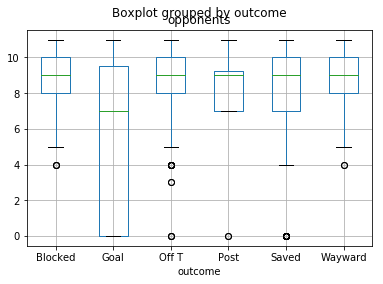

In [647]:
df.boxplot(column="opponents",by='outcome')
plt.show()

Ce boxplot montre la grande inluence du nombre de defenseurs sur la possibilité ou non de marquer un but, les tirs ratés correspondent pour la plupart à une situation avec beaucoup de défenseurs devant le tireur. Cependant la moyenne de défenseurs présent devant le tireur devant un but et aussi élevée, en effet les situation de 1 contre 1 ou de 2 contre 1 sont assez rares et les buts interviennent souvent face à une defense en place et au complet.



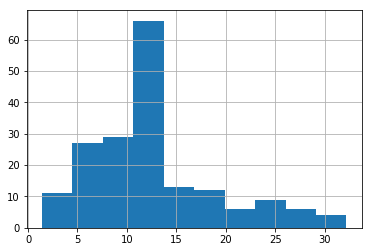

In [648]:
df[df["goal"]==1]["distance"].hist()

On peut voir que, logiquement, il y a moins de buts lorsque la distance est très importante. La distance idéale pour marquer semblre être en 10 et 15 mètres. Il n'y a pas énormément de buts extrêmement près car c'est plus compliqué de se retrouver très près du gardien. 

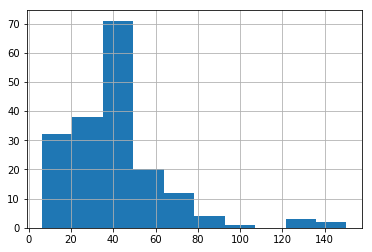

In [649]:
df[df["goal"]==1]["shooting_angle"].hist()

L'angle de tir idéal semble se trouver entre 35 et 50°. Il y a peu de buts au delà, probablement car cela implique d'être extrêmement près du but ce qui est plus compliqué. 

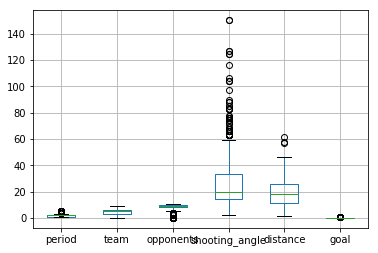

In [650]:
df[['period','team','opponents','shooting_angle','distance','goal']].boxplot()

D'un point de vue général, nos variables qualitatives ont des distributions très différentes. Il sera important d'homogénéiser lorsque l'on utilisera ces données.

### On représente les buts en rouge et les autres tirs en bleu. Ici, nous avons la distance en abscisse et l'angle de tir en ordonnée

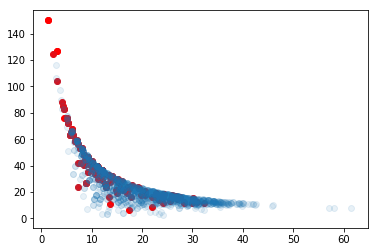

In [651]:
plt.scatter(df[df["goal"]==1]["distance"],df[df["goal"]==1]["shooting_angle"],c='r')
plt.scatter(df[df["goal"]==0]["distance"],df[df["goal"]==0]["shooting_angle"],alpha=0.1)
plt.show()

On observe que la distance diminue quand l'angle de tir augmente et que les buts sont plus nombreux avec une petite distance et un grand angle de tir

### Ici nous avons toujours l'angle de tir en ordonnée mais le nombre de joueurs dans les 5 mètres autour du frappeur en abscisse. 

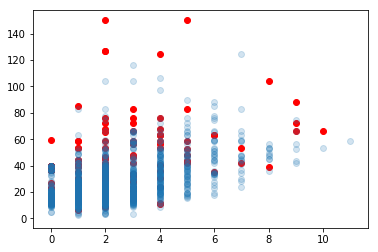

In [652]:
plt.scatter(df[df["goal"]==1]["circle5"],df[df["goal"]==1]["shooting_angle"],c='r')
plt.scatter(df[df["goal"]==0]["circle5"],df[df["goal"]==0]["shooting_angle"],alpha=0.2)
plt.show()

quelque soit le nombre de joueur devant le tireur, plus l'angle de tir augmente plus il y a de chance d'avoir un but. Moins il y a de joueurs, plus il y a de buts également.

### Ici nous avons le nombre de joueurs dans les 5 mètres et la distance en ordonnée. 

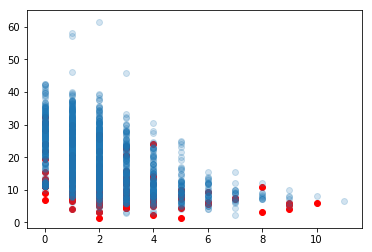

In [653]:
plt.scatter(df[df["goal"]==1]["circle5"],df[df["goal"]==1]["distance"],c='r')
plt.scatter(df[df["goal"]==0]["circle5"],df[df["goal"]==0]["distance"],alpha=0.2)
plt.show()

peut importe le nombre de joueur devant le tireur, plus la distance diminue plus on a de but

### Désormais, représentons les buts sur le terrain : 

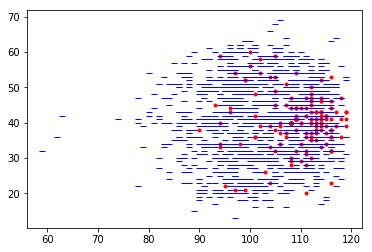

In [654]:
import matplotlib.pyplot as plt
but= [list(map(float,l)) for l in df[df["outcome"]=="Goal"]["location"]]
nonbut= [list(map(float,l)) for l in df[df["outcome"]!="Goal"]["location"]]

fig, ax = plt.subplots(1, 1)
ax.plot([x[0] for x in but],[x[1] for x in but],'.r',[x[0] for x in nonbut],[x[1] for x in nonbut],'_b')

Ici, on affiche les "buts" et les "non but". On voit clairement qu'il y a un plus grand équilibre entre ces deux outcome lorsque l'on frappe de près et face aux cages. Dès que l'on s'exentre ou que l'on tire de plus loin, il y a beaucoup plus de "non but" que de buts. 

## Corrélations entre les différentes variables quantitatives :

In [655]:
df['circle5']=pd.to_numeric(df['circle5'])
df['circle10']=pd.to_numeric(df['circle10'])
df['ratio']=pd.to_numeric(df['ratio'])
df['opponents']=pd.to_numeric(df['opponents'])
df['team']=pd.to_numeric(df['team'])
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')



,period,statbomb,1V1,circle5,circle10,ratio,team,opponents,shooting_angle,distance,goal
period,1,0.40426,-0.0296242,-0.101052,-0.150594,-0.281026,-0.224516,-0.343017,0.0982367,-0.111374,0.20223
statbomb,0.40426,1,0.141438,-0.108531,-0.182709,-0.587629,-0.537322,-0.707806,0.531396,-0.462343,0.535901
1V1,-0.0296242,0.141438,1,-0.0181152,-0.0653416,-0.147496,-0.180483,-0.142856,0.0415417,-0.161265,0.130934
circle5,-0.101052,-0.108531,-0.0181152,1,0.782385,0.127831,0.160866,0.27893,0.484314,-0.48444,-0.0201861
circle10,-0.150594,-0.182709,-0.0653416,0.782385,1,0.25588,0.300787,0.421307,0.468072,-0.471555,-0.0596069
ratio,-0.281026,-0.587629,-0.147496,0.127831,0.25588,1,0.910652,0.686538,-0.159461,0.316467,-0.30343
team,-0.224516,-0.537322,-0.180483,0.160866,0.300787,0.910652,1,0.827236,-0.13743,0.333723,-0.267035
opponents,-0.343017,-0.707806,-0.142856,0.27893,0.421307,0.686538,0.827236,1,-0.12155,0.26205,-0.357936
shooting_angle,0.0982367,0.531396,0.0415417,0.484314,0.468072,-0.159461,-0.13743,-0.12155,1,-0.751723,0.309302
distance,-0.111374,-0.462343,-0.161265,-0.48444,-0.471555,0.316467,0.333723,0.26205,-0.751723,1,-0.259057


La plupart des corrélations paraissent logiques et intuitives. Tout d'abord, "stat" et "but" sont très corrélés positivement, ce qui est rassurant car "stat" calcule la probabilité qu'il y aie but. "Angle_de_tir" est positivement corrélé avec "stat" ce qui est logique également, tout comme "period" et "stat" : les équipes fatiguent donc il y a plus de buts en 2ème mi-temps. 

A l'inverse, "distance" est très négativement corrélée à "stat" et à "but" (logique aussi, plus un joueur est loin moins il marque). "Adversaires" et "equipe" sont aussi très négativement corrélées avec "stat", tout comme, dans une moindre mesure, cercle5 et cercle10 : en effet, plus il y a de joueurs devant le frappeur, moins il a de chance de marquer. 

Notre seul surprise se trouve dans le fait que "1vs1" et "stat" ne soit que peu positivement corrélés.

Dans ces variables on va choisir pour notre ACP les variables les plus corrélées (négativement ou positivement) à la variable "goal". Entre "ratio", "team" et "opponents" qui sont très corrélées entre elles, on va seulement garder "opponents" et "team" qui portent l'information de "ratio". Ensuite, on gardera les variables "period", "shooting_angle" et "distance".



# Partie 2 : Analyse en Composantes Principales (ACP)

In [656]:
from sklearn.decomposition import PCA

On importe la méthode PCA de scikit learn

In [657]:
pca = PCA(n_components=4)
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

On fixe le nombre de composantes principales. 

In [658]:
dfapprentissage=df[['period','team','opponents','shooting_angle','distance','goal']]
shape(dfapprentissage)
dfapprentissage[dfapprentissage.columns[:-1]]

,period,team,opponents,shooting_angle,distance
16,1,5,9,10.447233,36.891733
226,1,3,8,12.833300,24.758837
244,1,0,6,14.036243,20.000000
256,1,3,6,27.973680,16.031220
262,1,4,7,23.716189,19.026298
425,1,5,8,14.878768,28.792360
748,1,3,8,20.741588,13.601471
896,1,3,7,24.670745,15.000000
1018,1,6,10,11.246715,39.812058
1068,1,7,10,11.462180,29.732137


La on ne prend pour l'acp que les variables quantitatives. La variable but est la variable a exprimé en fonction des composantes principales qui seront determinées.

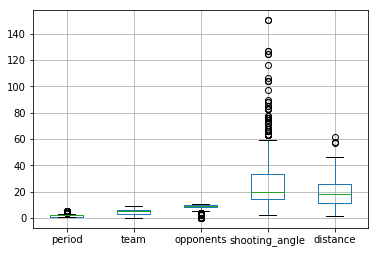

In [659]:
dfapprentissage[dfapprentissage.columns[:-1]].boxplot()
plt.savefig('Variancbeforeeacp.png')
plt.show()    

On s'aperçoit en regardant la répartition des variables quantitatives que l'on va utiliser pour l'acp que les dispersion sont très différentes. Il est donc utile de centrer et réduire nos données.

In [660]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
apprentissage = scaler.fit_transform(dfapprentissage[dfapprentissage.columns[:-1]])

standradscaler sert à réduire et centrer les données, pour éviter que une variable avec une trop grosse variance prenne plus d'importance que les autres dans la création des composantes principales.

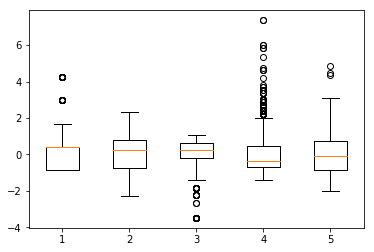

In [661]:
plt.boxplot(apprentissage)
plt.savefig('Varianceafterreduction.png')
plt.show()

On voit que les variables centrées réduites sont dispersées de manière plus homogènes que les variables d'origine avec la variable angle_de_tir qui avait une variance très élevée.

In [662]:
C = pca.fit_transform(apprentissage)

On peut faire le fit et le transform séparément. Le fit permet d'apprendre, et le transform change les individus de base. Leurs coordonnées sont maintenant exprimées dans la base des vecteurs propres de l'acp. 

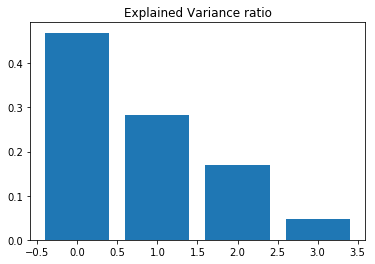

In [663]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Explained Variance ratio")
plt.savefig('explainedvariance.png')

Ici, on observe l'inertie de chaque composante principale sur la représentation des variables d'origine. Les deux premières composantes principales sont importantes dans notre représentation.

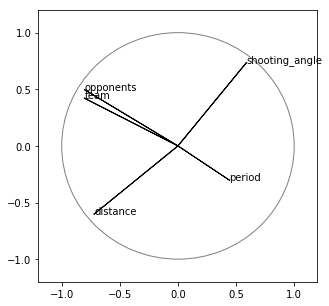

In [664]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dfapprentissage.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)

plt.savefig('variablecircleacp.png') 
plt.show()

Ici on affiche les variables d'origine sur les deux axes principaux. On observe que la variable shooting_angle et la variable distance sont négativement corrélées. En effet, plus un joueur est à une distance faible du but, plus son angle de tir est élevé. On voit aussi que les variables opponents et team ont les mêmes composantes sur les axes principaux, elles sont très corrélées. C'est logique car plus il y a de joueur dans notre côté du terrain, plus on a besoin de défenseurs. 

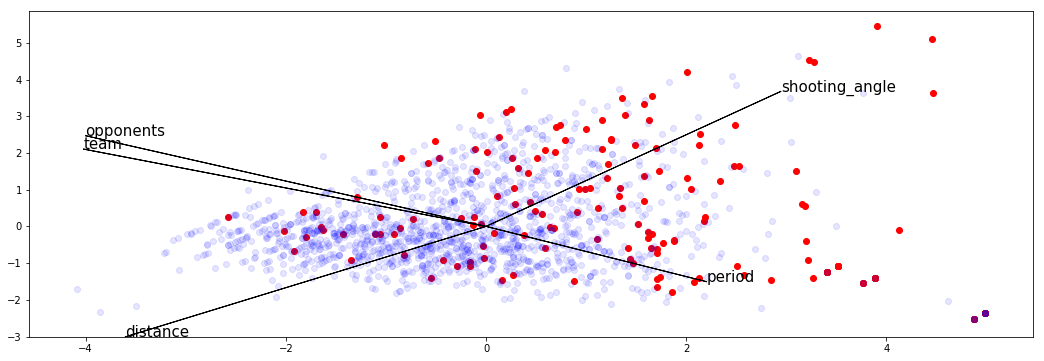

In [665]:
X_reduced = pca.transform(apprentissage)
X_reduced_goal = X_reduced[np.array(dfapprentissage['goal']),:]
X_reduced_not_goal = X_reduced[~ np.array(dfapprentissage['goal']),:]
plt.figure(figsize=(18,6))
plt.scatter(X_reduced_goal[:, 0], X_reduced_goal[:, 1], c='red', alpha=1)
plt.scatter(X_reduced_not_goal[:, 0], X_reduced_not_goal[:, 1], c='blue', alpha=0.1)

coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
for i, j, nom in zip(coord1,coord2, dfapprentissage.columns):
    plt.text(i*5, j*5, nom, fontsize=15)
    plt.arrow(0,0,i*5,j*5,color='black')
plt.savefig('individusacp.png')
plt.show()

On observe en bleu les tirs ratés et en rouge les buts. Deux tendances se dégagent bien de ce shéma. Les  buts sont plus décalés en général vers la droite. Il y a donc des schémas de buts qui reviennent souvent : lorsque la distance est faible et l'angle de tir est important. Pour conclure, nous pouvons dire que l'acp confirme nos hypothèses faites lors de la phase exploratoire. 

# Partie2: Variables qualitatives

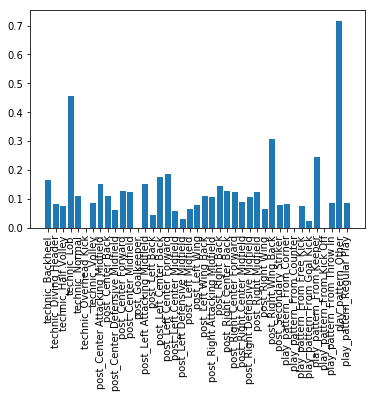

In [666]:
dff=df[['technic','post','play_pattern','goal']]
dffd=pd.get_dummies(dff)
probmarquer=[]
for i in dffd.columns.drop('goal'):
    probmarquer+=[dffd[dffd[i]==1]['goal'].mean()]
plt.bar(np.arange(len(probmarquer)),probmarquer)
plt.xticks(range(len(probmarquer)), dffd.columns.drop('goal'),rotation = 90)
plt.show()

Si on s'intéresse maintenant aux variables qualitatives en sélectionnant celles que nous trouvons intéresssantes, nous pouvons afficher la probabilité de marquer un but pour chaque modalité de ces variables

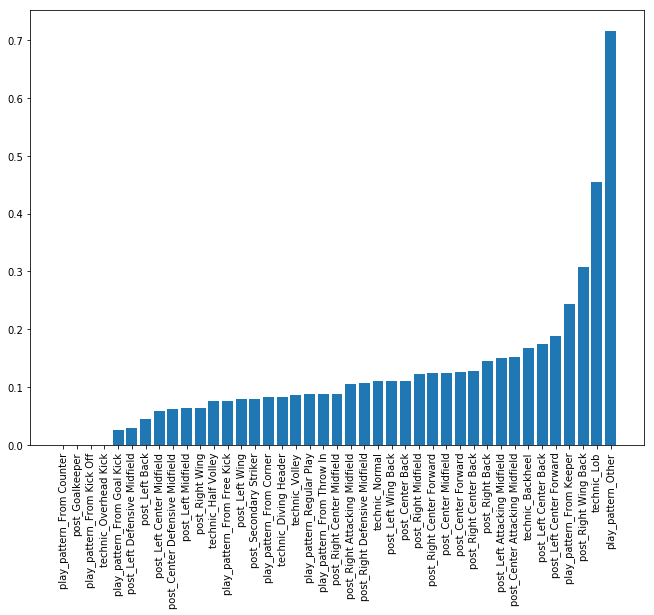

In [667]:
plt.figure(3,figsize=(11,8))
plt.bar(np.arange(len(probmarquer)),sort(probmarquer))
plt.xticks(range(len(probmarquer)),dffd.columns.drop('goal')[np.argsort(probmarquer)] ,rotation = 90)
plt.show()

En les ordonnant, on observe par exemple que les modalités qui influence le plus les buts sont un tir en lob ou alors par exemple un poste sur l'aile arrière droite.

# Partie 3 : Regressions logistiques

## A) Définition des diffférents dataset d'apprentissage

In [668]:
scaler = StandardScaler()
dataframe=df
dataframe[['period','team','opponents','shooting_angle','distance']] = scaler.fit_transform(dataframe[['period','team','opponents','shooting_angle','distance']])
dataframe=dataframe[['period','team','opponents','shooting_angle','distance','technic','post','play_pattern','goal']]


On scale les données quantitatives pour utiliser des données homogènes dans la régression logistique.

In [669]:
from sklearn.model_selection import train_test_split

dataframe=pd.get_dummies(dataframe)
X_train, X_test, y_train, y_test = train_test_split( dataframe[dataframe.columns.drop('goal')], dataframe['goal'], test_size=0.3)
X_train1=X_train[['period','team','opponents','shooting_angle','distance']]
X_test1=X_test[['period','team','opponents','shooting_angle','distance']]
X_test2=X_test
X_train2=X_train
X_train3=X_train
X_test3=X_test
    
Train=pd.concat([X_train3,y_train],axis=1)
X_traingoal=Train[Train.columns.drop('goal')][Train['goal']==True]
y_traingoal=Train[Train['goal']==True]['goal']
X_train3=pd.concat([X_train3,X_traingoal,X_traingoal,X_traingoal],axis=0)
y_train3=pd.concat([y_train,y_traingoal,y_traingoal,y_traingoal],axis=0)
y_test1=y_test
y_test2=y_test
y_test3=y_test
y_train1=y_train
y_train2=y_train

Premier dataset avec seulement nos variables quantitatives
Deuxième dataset avec ajout des variables qulitatives
Troisième dataset avec dupication des buts sur l'apprentissage du deuxième dataset pour former un suréchantillon

On importe tout d'abord la méthode train_test_split qui permet de transformer un échantillon de données en deux parties: apprentissage et tests.Ensuite on entraîne la régression logistique sur l'échatillon d'apprentissage. On s'entraîne sur 70% des individus.On tente de prédire sur 30% des données restantes.

## B) Apprentissages

In [670]:
from sklearn import linear_model as lm

reglog1=lm.LogisticRegression()
reglog2=lm.LogisticRegression()
reglog3=lm.LogisticRegression()

        
fitter1= reglog1.fit(X_train1,y_train) 
fitter2= reglog2.fit(X_train2,y_train) 
fitter3= reglog3.fit(X_train3,y_train3) 

On fit nos données sur les différents datasets d'apprentissages

## C) Tests

On va tout d'abord s'attarder su le score de chaque apprentissage.

In [671]:
score1=fitter1.score(X_test1,y_test1)
score2=fitter2.score(X_test2,y_test2)
score3=fitter3.score(X_test3,y_test3)
print(score1,score2,score3)

0.8984375 0.896484375 0.884765625


Nos 3 modèles ont des scores similaires. En rajoutant des buts dans l'apprentissages on perd tout de même en score.

In [672]:
prediction1=fitter1.predict (X_test1)
prediction2=fitter2.predict (X_test2)
prediction3=fitter3.predict (X_test3)

In [673]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,prediction1))
print(classification_report(y_test2,prediction2))
print(classification_report(y_test3,prediction3))

             precision    recall  f1-score   support

      False       0.92      0.97      0.94       456
       True       0.57      0.30      0.40        56

avg / total       0.88      0.90      0.88       512

             precision    recall  f1-score   support

      False       0.92      0.97      0.94       456
       True       0.55      0.30      0.39        56

avg / total       0.88      0.90      0.88       512

             precision    recall  f1-score   support

      False       0.94      0.93      0.94       456
       True       0.47      0.50      0.49        56

avg / total       0.89      0.88      0.89       512



On observe déjà sur une seule itération que le recall sur les positifs (buts) est plus important pour notre modèle 3 mais avec une précision moins bonne. On gagne 20% sur le recall que l'on perd sur la précision ce qui explique les scores similaires. Car le score donne autant d'importance à la précision qu'au recall.

In [674]:
from sklearn.metrics import mean_squared_error
probas1=fitter1.predict_proba(X_test1)[:,1]
probas2=fitter2.predict_proba(X_test2)[:,1]
probas3=fitter3.predict_proba(X_test3)[:,1]
MSE1=mean_squared_error(y_test1,probas1 )
MSE2=mean_squared_error(y_test2,probas2 )
MSE3=mean_squared_error(y_test3, probas3)
print(MSE1,MSE2,MSE3)

0.07508037773317441 0.07856154341925614 0.10510718181213236


Cette métrique du MSE n'a pas trop d'intérèt vu le nombre de tirs ratés..

In [675]:
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test1, prediction1)
cf1 = pd.DataFrame(conf1, columns=['predicted ' + _ for _ in [ "false","true"]])
cf1.index = ['real ' + _ for _ in ["false","true"]]

conf2 = confusion_matrix(y_test2, prediction2)
cf2= pd.DataFrame(conf2, columns=['predicted ' + _ for _ in [ "false","true"]])
cf2.index = ['real ' + _ for _ in ["false","true"]]

conf3 = confusion_matrix(y_test3, prediction3)
cf3 = pd.DataFrame(conf3, columns=['predicted ' + _ for _ in [ "false","true"]])
cf3.index = ['real ' + _ for _ in ["false","true"]]

print(cf1)
print(cf2)
print(cf3)

            predicted false  predicted true
real false              443              13
real true                39              17
            predicted false  predicted true
real false              442              14
real true                39              17
            predicted false  predicted true
real false              425              31
real true                28              28


In [676]:
df["goal_statbomb"]=[1 if k>0.5 else 0 for k in df["statbomb"]]
framecomparaisonstatbomb=pd.concat([y_test2,df["goal_statbomb"],df["statbomb"]], axis=1, join='inner')


Si on veut pouvoir afficher la courbe ROC de statsbomb, on a besoin de concatener ici différentes colonnes pour que les indices de la colonne des buts de stats bombes correspondent bien aux indices que l'on utilise dans le test (car on a splité aléatoirement c'est donc important de rechercher  après les bons indices)

In [677]:
print(mean_squared_error(framecomparaisonstatbomb["statbomb"],probas2))

0.005855604078282834


L'erreur moyenne entre nos prédictions et celles de statbomb est très faible. Cela signifie que nos prédictions sont très similaires


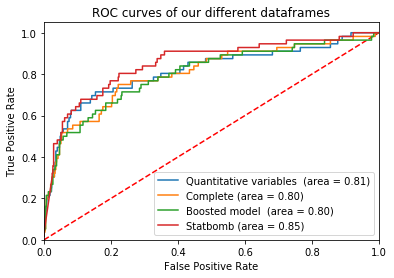

In [678]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr1, tpr1, thresholds1 = roc_curve(y_test1, probas1)
auc1=auc(fpr1,tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test2, probas2)
auc2=auc(fpr2,tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test3, probas3)
auc3=auc(fpr3,tpr3)

fpr4, tpr4, thresholds4 = roc_curve(y_test2,framecomparaisonstatbomb["statbomb"])
auc4=auc(fpr4,tpr4)

plt.figure()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of our different dataframes')


plt.plot(fpr1, tpr1, label='Quantitative variables  (area = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='Complete (area = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, label='Boosted model  (area = %0.2f)' % auc3)
plt.plot(fpr4, tpr4, label='Statbomb (area = %0.2f)' % auc4)

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Visuellement, le modèle de statsbomb a une bien meilleure aire sous la courbe, ceci est vérifier par la fonction "auc" de scikit learn metrics.

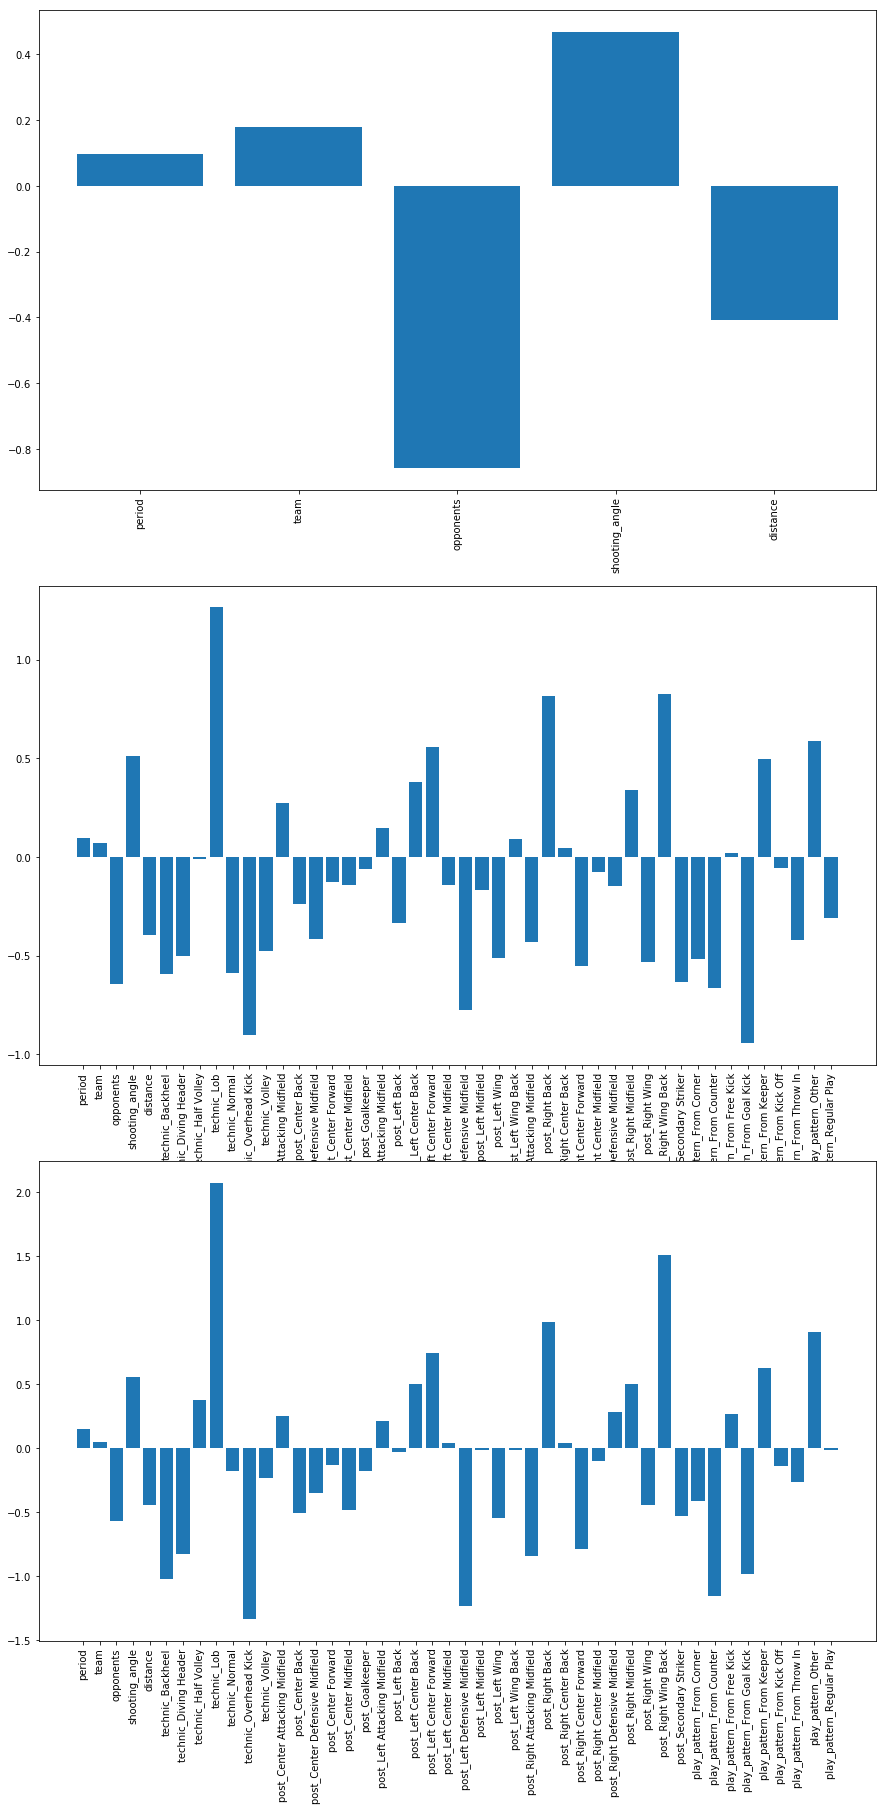

In [679]:

plt.figure(1,figsize=(15,30))
plt.subplot(311)
plt.bar(np.arange(len(fitter1.coef_[0])),fitter1.coef_[0])
plt.xticks(range(len(fitter1.coef_[0])), X_train1.columns,rotation = 90)
plt.subplot(312)
plt.bar(np.arange(len(fitter2.coef_[0])),fitter2.coef_[0])
plt.xticks(range(len(fitter2.coef_[0])), X_train2.columns,rotation = 90)
plt.subplot(313)
plt.bar(np.arange(len(fitter3.coef_[0])),fitter3.coef_[0])
plt.xticks(range(len(fitter3.coef_[0])), X_train3.columns,rotation = 90)
plt.show()


In [680]:
print(X_train1.columns[abs(fitter1.coef_[0]).argmax()])
print(X_train2.columns[abs(fitter2.coef_[0]).argmax()])
print(X_train3.columns[abs(fitter3.coef_[0]).argmax()])

opponents
technic_Lob
technic_Lob


Il est intéressant d'afficher les coefficients de la régression logistique afin de voir à quelles variables l'algorithme a donné de l'importance. Opponents semble être la varibale la plus importante suivie de près par l'angle de tir devant le tireur. Lorsque l'on rajoute les variables qualitatives, cela n'a pas d'effets sur les variables quantitatives importantes qui le restent. Le suréchantillonage n'a pas l'air de changer grand chose non plus.

<font color=blue>
La on fait une fonction qui affiche tout en meme temps mais pour seulement une itération

Nosu traitons  variables quantitatives
Le score de cette régression logistique est de :  0.8984375
Nous pouvons identifier les indicateurs de précision suivants : 
             precision    recall  f1-score   support

      False       0.92      0.97      0.94       456
       True       0.57      0.30      0.40        56

avg / total       0.88      0.90      0.88       512

La matrice de confusion est la suivante : 
            prédit false  prédit true
vrai false           443           13
vrai true             39           17
La courbe Roc de cette régression est : 


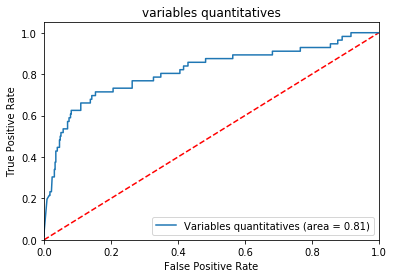

L'importance de chaque  variable peut être observée sur ce shéma : 


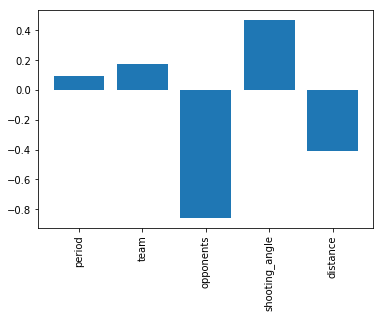

La variable la plus importante dans cette régression est donc : 
opponents


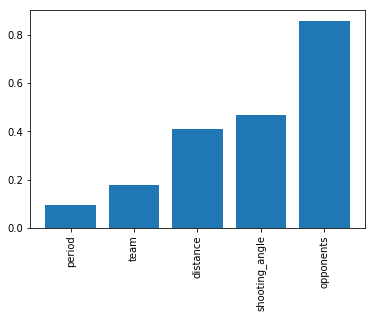

In [683]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import linear_model as lm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def tests (X_train, X_test,y_train, y_test,title):
    
    print("Nosu traitons ", title)
    reglog=lm.LogisticRegression()
    fitter = reglog.fit(X_train,y_train)
    score=fitter.score(X_test,y_test)
    print("Le score de cette régression logistique est de : ", score)
    prediction=fitter.predict (X_test)
    print("Nous pouvons identifier les indicateurs de précision suivants : ")
    print(classification_report(y_test,prediction))
    probas=fitter.predict_proba(X_test)[:,1]
    MSE=mean_squared_error(y_test,probas )
    conf = confusion_matrix(y_test, prediction)
    cf = pd.DataFrame(conf, columns=['prédit ' + _ for _ in [ "false","true"]])
    cf.index = ['vrai ' + _ for _ in ["false","true"]]
    print("La matrice de confusion est la suivante : ")
    print(cf)
    
    print("La courbe Roc de cette régression est : ")
    
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    auc1=auc(fpr,tpr)
    plt.figure()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.plot(fpr, tpr, label='Variables quantitatives (area = %0.2f)' % auc1)
    plt.legend(loc="lower right")
    plt.show()
    
    print("L'importance de chaque  variable peut être observée sur ce shéma : ")
    coef=fitter.coef_[0]
    plt.figure()
    plt.bar(np.arange(len(coef)),coef)
    plt.xticks(range(len(coef)), X_train.columns,rotation = 90)
    plt.show()
    
    print("La variable la plus importante dans cette régression est donc : ")
    print(X_train.columns[abs(coef).argmax()])
    
    index=np.argsort(abs(coef))
    plt.figure()
    plt.bar(np.arange(len(coef)),abs(coef[index]))
    plt.xticks(range(len(coef)), X_train.columns[index],rotation = 90)
    plt.show()
        
    
tests(X_train1, X_test1, y_train1, y_test1, 'variables quantitatives')

Nosu traitons  variables quantitatives + qualitatives
Le score de cette régression logistique est de :  0.896484375
Nous pouvons identifier les indicateurs de précision suivants : 
             precision    recall  f1-score   support

      False       0.92      0.97      0.94       456
       True       0.55      0.30      0.39        56

avg / total       0.88      0.90      0.88       512

La matrice de confusion est la suivante : 
            prédit false  prédit true
vrai false           442           14
vrai true             39           17
La courbe Roc de cette régression est : 


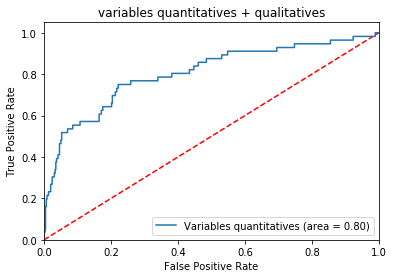

L'importance de chaque  variable peut être observée sur ce shéma : 


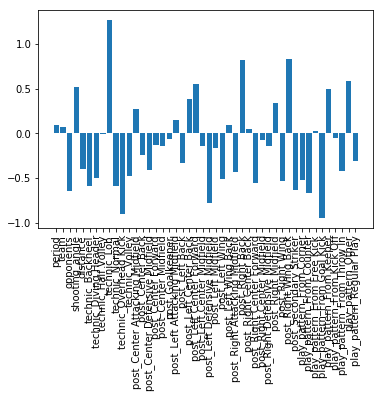

La variable la plus importante dans cette régression est donc : 
technic_Lob


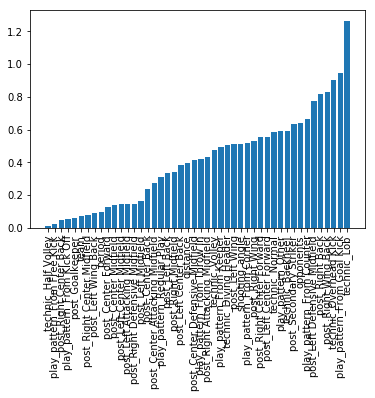

In [684]:
tests(X_train2, X_test2, y_train2, y_test2, 'variables quantitatives + qualitatives')

Sur une itération on peut avoir un résultat différent à chaque fois, on fera donc plus tard plus d'itération pour faire des moyennes.

In [685]:
def airesouscourbe(x,y):
    interx=[x[i+1]-x[i] for i in range(len(x)-1)]
    airerectangles=[interx[i]*y[i] for i in range(len(y)-1)]
    return sum(airerectangles)

airesouscourbe(np.array([1,2,3,4]),np.array([5,5,5,6]))

15

Ceci est un essaie de calcul à la main de l'aire sous la courbe ROC. Cette fonction donne des résultats similaires.

In [686]:
import scipy.integrate as integrate
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import interp1d
    
def Testbis(dataframe,k):


    listeaire1=[]
    listefpr1=[]
    listetpr1=[]
    
    listeaire2=[]
    listefpr2=[]
    listetpr2=[]
    
    listeaire3=[]
    listefpr3=[]
    listetpr3=[]
    
    xs = np.linspace(0, 1, 100)



    for i in range(k): 
    
        reglog1=lm.LogisticRegression()
        reglog2=lm.LogisticRegression()
        reglog3=lm.LogisticRegression()
        dataframe=pd.get_dummies(dataframe)
        X_train, X_test, y_train, y_test = train_test_split( dataframe[dataframe.columns.drop('goal')], dataframe['goal'], test_size=0.3, random_state=i)
        X_train1=X_train[['period','team','opponents','shooting_angle','distance']]
        X_test1=X_test[['period','team','opponents','shooting_angle','distance']]
        X_test2=X_test
        X_train2=X_train
    
        X_train3=X_train
        X_test3=X_test
    
        Train=pd.concat([X_train3,y_train],axis=1)
        X_traingoal=Train[Train.columns.drop('goal')][Train['goal']==True]
        y_traingoal=Train[Train['goal']==True]['goal']
        X_train3=pd.concat([X_train3,X_traingoal,X_traingoal,X_traingoal],axis=0)
        y_train3=pd.concat([y_train,y_traingoal,y_traingoal,y_traingoal],axis=0)
        
        fitter1= reglog1.fit(X_train1,y_train) 
        fitter2= reglog2.fit(X_train2,y_train) 
        fitter3= reglog3.fit(X_train3,y_train3) 
        
        prediction1=fitter1.predict (X_test1)
        probas1=fitter1.predict_proba(X_test1)[:,1]
        fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1)
        listeaire1+=[airesouscourbe(fpr1,tpr1)]
        
        prediction2=fitter2.predict (X_test2)        
        probas2=fitter2.predict_proba(X_test2)[:,1]
        fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2)
        listeaire2+=[airesouscourbe(fpr2,tpr2)]
        
        prediction3=fitter3.predict (X_test3)
        probas3=fitter3.predict_proba(X_test3)[:,1]
        fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3)
        listeaire3+=[airesouscourbe(fpr3,tpr3)]


        spl1=interp1d(fpr1,tpr1)
        spl2=interp1d(fpr2,tpr2)
        spl3=interp1d(fpr3,tpr3)


        if i==0:

            listetpr1=spl1(xs)
            listetpr2=spl2(xs)
            listetpr3=spl3(xs)
        else:

            listetpr1=[listetpr1[k]+spl1(xs)[k] for k in range(len(listetpr1))]
            listetpr2=[listetpr2[k]+spl2(xs)[k] for k in range(len(listetpr2))]
            listetpr3=[listetpr3[k]+spl3(xs)[k] for k in range(len(listetpr3))]
            
        
    dataframe["goal_statbomb"]=[1 if k>0.5 else 0 for k in df["statbomb"]]
    framecomparaisonstatbomb=pd.concat([df["goal_statbomb"],df["statbomb"]], axis=1, join='inner')

    aire4 = roc_auc_score(dataframe['goal'],framecomparaisonstatbomb["goal_statbomb"])
    fpr4, tpr4, thresholds4 = roc_curve(dataframe['goal'],framecomparaisonstatbomb["statbomb"])
    
    listetpr1=[listetpr1[l]/k for l in range(len(listetpr1))]
    listetpr2=[listetpr2[l]/k for l in range(len(listetpr2))]
    listetpr3=[listetpr3[l]/k for l in range(len(listetpr3))]
    plt.figure()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Mean roc curve of our different models')
    plt.plot(xs, listetpr1, label='Quantitative variables  (area = %0.2f)' % mean(listeaire1))
    plt.plot(xs, listetpr2, label='Complete (area = %0.2f)' % mean(listeaire2))
    plt.plot(xs, listetpr3, label='Boosted model (area = %0.2f)' % mean(listeaire3))
    plt.plot(fpr4, tpr4, label='Statbomb (area = %0.2f)' %airesouscourbe(fpr4,tpr4))
    
    plt.legend(loc="lower right")
    plt.show()




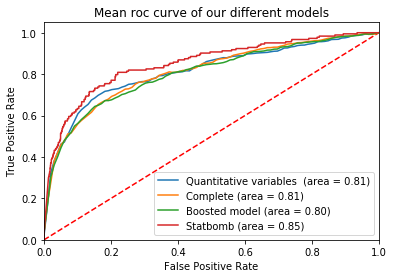

In [687]:
dfapprentissage=df[['period','team','opponents','shooting_angle','distance','technic','post','play_pattern','goal']]
Testbis(dfapprentissage,10)

Ici on essaye de faire une moyenne des coourbes ROC car sur un seul essaie c'est trop aléatoire. On pense bien à changer le random state à chaque itération pour ne jamais prendre les mêmes échantillons de test et d'apprentissages. Cette fonction centralise tous nos tests:

In [688]:



from sklearn import metrics
def TestS(dataframe,k):

    listescore1=[]
    listescore2=[]
    listescore3=[]
    coef1=[]
    coef2=[]
    coef3=[]
    recall1=[]
    recall2=[]
    recall3=[]
    precision1=[]
    precision2=[]
    precision3=[]

    listeaire1=[]
    listefpr1=[]
    listetpr1=[]
    
    listeaire2=[]
    listefpr2=[]
    listetpr2=[]
    
    listeaire3=[]
    listefpr3=[]
    listetpr3=[]
    
    listefn1=[]
    listetn1=[]
    listetp1=[]
    listefp1=[]
    
    listefn2=[]
    listetn2=[]
    listetp2=[]
    listefp2=[]
    
    listefn3=[]
    listetn3=[]
    listetp3=[]
    listefp3=[]
    
    
    xs = np.linspace(0, 1, 100)
    for i in range(k): 
    
        reglog1=lm.LogisticRegression(penalty='l1')
        reglog2=lm.LogisticRegression(penalty='l2')
        reglog3=lm.LogisticRegression(penalty='l2')
        dataframe=pd.get_dummies(dataframe)
        X_train, X_test, y_train, y_test = train_test_split( dataframe[dataframe.columns.drop('goal')], dataframe['goal'], test_size=0.3, random_state=i)
        X_train1=X_train[['period','team','opponents','shooting_angle','distance']]
        X_test1=X_test[['period','team','opponents','shooting_angle','distance']]
        X_test2=X_test
        X_train2=X_train
    
        X_train3=X_train
        X_test3=X_test
    

        Train=pd.concat([X_train3,y_train],axis=1)
        X_traingoal=Train[Train.columns.drop('goal')][Train['goal']==True]
        y_traingoal=Train[Train['goal']==True]['goal']
        X_train3=pd.concat([X_train3,X_traingoal,X_traingoal,X_traingoal],axis=0)
        y_train3=pd.concat([y_train,y_traingoal,y_traingoal,y_traingoal],axis=0)
        
        fitter1= reglog1.fit(X_train1,y_train) 
        fitter2= reglog2.fit(X_train2,y_train) 
        fitter3= reglog3.fit(X_train3,y_train3) 
        
        listescore1+=[fitter1.score(X_test1,y_test)]
        listescore2+=[fitter2.score(X_test2,y_test)]
        listescore3+=[fitter3.score(X_test3,y_test)]
    
        prediction1=fitter1.predict (X_test1) 
        prediction2=fitter2.predict (X_test2)       
        prediction3=fitter3.predict (X_test3)
        
        
        probas1=fitter1.predict_proba(X_test1)[:,1]
        fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1)
        listeaire1+=[auc(fpr1,tpr1)]
        
       
        probas2=fitter2.predict_proba(X_test2)[:,1]
        fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2)
        listeaire2+=[auc(fpr2,tpr2)]
        
        probas3=fitter3.predict_proba(X_test3)[:,1]
        fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3)
        listeaire3+=[auc(fpr3,tpr3)]
        
        tn1, fp1, fn1, tp1 = confusion_matrix(y_test, prediction1).ravel()
        listetn1+=[tn1]
        listefp1+=[fp1]
        listefn1+=[fn1]
        listetp1+=[tp1]
        
        conf1 = confusion_matrix(y_test, prediction1)
        cf1 = pd.DataFrame(conf1, columns=['predicted ' + _ for _ in [ "false","true"]])
        cf1.index = ['real ' + _ for _ in ["false","true"]]

        tn2, fp2, fn2, tp2 = confusion_matrix(y_test, prediction2).ravel()
        listetn2+=[tn2]
        listefp2+=[fp2]
        listefn2+=[fn2]
        listetp2+=[tp2]
        
        conf2 = confusion_matrix(y_test, prediction2)
        cf2= pd.DataFrame(conf2, columns=['predicted ' + _ for _ in [ "false","true"]])
        cf2.index = ['real ' + _ for _ in ["false","true"]]
        
        tn3, fp3, fn3, tp3 = confusion_matrix(y_test, prediction3).ravel()
        listetn3+=[tn3]
        listefp3+=[fp3]
        listefn3+=[fn3]
        listetp3+=[tp3]
        
        conf3 = confusion_matrix(y_test, prediction3)
        cf3 = pd.DataFrame(conf3, columns=['predicted ' + _ for _ in [ "false","true"]])
        cf3.index = ['real ' + _ for _ in ["false","true"]]
        
        
        recall1+=[metrics.recall_score(y_test,prediction1)]
        recall2+=[metrics.recall_score(y_test,prediction2)]
        recall3+=[metrics.recall_score(y_test,prediction3)]
        precision1+=[metrics.precision_score(y_test,prediction1)]
        precision2+=[metrics.precision_score(y_test,prediction2)]
        precision3+=[metrics.precision_score(y_test,prediction3)]
        
        spl1=interp1d(fpr1,tpr1)
        spl2=interp1d(fpr2,tpr2)
        spl3=interp1d(fpr3,tpr3)


        if i==0:
            coef1=fitter1.coef_[0]
            coef2=fitter2.coef_[0]
            coef3=fitter3.coef_[0]
            listetpr1=spl1(xs)
            listetpr2=spl2(xs)
            listetpr3=spl3(xs)
        else:

            coef1=[coef1[k]+fitter1.coef_[0][k] for k in range(len(coef1))]
            coef2=[coef2[k]+fitter2.coef_[0][k] for k in range(len(coef2))]
            coef3=[coef3[k]+fitter3.coef_[0][k] for k in range(len(coef3))]
            listetpr1=[listetpr1[k]+spl1(xs)[k] for k in range(len(listetpr1))]
            listetpr2=[listetpr2[k]+spl2(xs)[k] for k in range(len(listetpr2))]
            listetpr3=[listetpr3[k]+spl3(xs)[k] for k in range(len(listetpr3))]
            
            
    recal1=mean(recall1)
    recal2=mean(recall2)
    recal3=mean(recall3)
    prec1=mean(precision1)
    prec2=mean(precision2)
    prec3=mean(precision3)
    boxplot([listescore1,listescore2,listescore3])
    plt.title("Quantitative           Complete              Boosted")
    show()
    print("La moyenne des scores pour le modèle 1 est de : ", mean(listescore1))
    print("La moyenne des scores pour le modèle 2 est de : ", mean(listescore2))
    print("La moyenne des scores pour le modèle 3 est de : ", mean(listescore3))
    
    boxplot([precision1,precision2,precision3])
    plt.title("Quantitative           Complete              Boosted")
    show()
    print("la moyenne des précisions du model 1 est de : ", prec1)
    print("la moyenne des précisions du model 2 est de : ", prec2)
    print("la moyenne des précisions du model 3 est de : ", prec3)
    boxplot([recall1,recall2,recall3])
    plt.title("Quantitative           Complete              Boosted")
    show()
    print("la moyenne des recall du model 1 est de : ", recal1)
    print("la moyenne des recall du model 2 est de : ", recal2)
    print("la moyenne des recall du model 3 est de : ", recal3)
    
    tn3=mean(listetn3)
    fp3=mean(listefp3)
    fn3=mean(listefn3)
    tp3=mean(listetp3)
    conf3 = np.array([tn3,fp3,fn3,tp3]).reshape((2,2))
    cf3 = pd.DataFrame(conf3, columns=['predicted ' + _ for _ in [ "false","true"]])
    cf3.index = ['real ' + _ for _ in ["false","true"]]
        
    
    tn2=mean(listetn2)
    fp2=mean(listefp2)
    fn2=mean(listefn2)
    tp2=mean(listetp2)
    conf2 = np.array([tn2,fp2,fn2,tp2]).reshape((2,2))
    cf2 = pd.DataFrame(conf2, columns=['predicted ' + _ for _ in [ "false","true"]])
    cf2.index = ['real ' + _ for _ in ["false","true"]]
        
    
    tn1=mean(listetn1)
    fp1=mean(listefp1)
    fn1=mean(listefn1)
    tp1=mean(listetp1)
    conf1 = np.array([tn1,fp1,fn1,tp1]).reshape((2,2))
    cf1 = pd.DataFrame(conf1, columns=['predicted ' + _ for _ in [ "false","true"]])
    cf1.index = ['real ' + _ for _ in ["false","true"]]
        

        
    coef1=[coef1[l]/k for l in range(len(coef1))]
    coef2=[coef2[l]/k for l in range(len(coef2))]
    coef3=[coef3[l]/k for l in range(len(coef3))]
    print("la table des résulats du modèle quantitatif est la suivante: ")
    print(cf1)
    print("la table des résulats du modèle complet est la suivante: ")
    print(cf2)
    print("la table des résulats du modèle boosted est la suivante: ")
    print(cf3)
    

    
   
    
    print("L'importance de chaque  variable peut être observée sur ce shéma : ")
    plt.figure(1)
    plt.bar(np.arange(len(coef3)),coef3,color=['red' if coef3[k]>=0 else 'green' for k in arange(len(coef3))])
    plt.xticks(range(len(coef3)), X_train3.columns,rotation = 90)
    plt.show()
    
    print("La variable la plus importante dans cette régression est donc : ")
    print(X_train3.columns[abs(np.array(coef3)).argmax()])
    
    index=np.argsort(np.abs(np.array(coef3)))
    plt.figure(2,figsize=(11,8))
    plt.bar(np.arange(len(coef3)),np.abs(np.array(coef3)[index]),color=['red' if coef3[k]>=0 else 'green' for k in index])
    plt.xticks(range(len(coef3)), X_train3.columns[index],rotation = 90)
    plt.legend(['Negative coefficient', 'Positive coefficient'],loc=2)
    plt.show()
            
    dataframe["goal_statbomb"]=[1 if k>0.5 else 0 for k in df["statbomb"]]
    framecomparaisonstatbomb=pd.concat([df["goal_statbomb"],df["statbomb"]], axis=1, join='inner')

    aire4 = roc_auc_score(dataframe['goal'],framecomparaisonstatbomb["goal_statbomb"])
    fpr4, tpr4, thresholds4 = roc_curve(dataframe['goal'],framecomparaisonstatbomb["statbomb"])
    
    listetpr1=[listetpr1[l]/k for l in range(len(listetpr1))]
    listetpr2=[listetpr2[l]/k for l in range(len(listetpr2))]
    listetpr3=[listetpr3[l]/k for l in range(len(listetpr3))]
    plt.figure()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Mean roc curve of our different models')
    plt.plot(xs, listetpr1, label='Quantitative variables  (area = %0.2f)' % mean(listeaire1))
    plt.plot(xs, listetpr2, label='Complete (area = %0.2f)' % mean(listeaire2))
    plt.plot(xs, listetpr3, label='Boosted model (area = %0.2f)' % mean(listeaire3))
    plt.plot(fpr4, tpr4, label='Statbomb (area = %0.2f)' % auc(fpr4,tpr4))
    
    plt.legend(loc="lower right")
    plt.show()
    

    return index,coef3
    

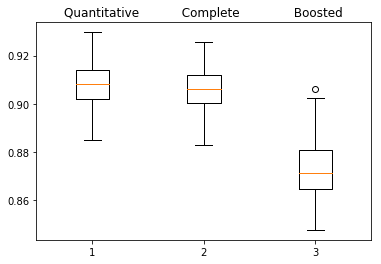

La moyenne des scores pour le modèle 1 est de :  0.90849609375
La moyenne des scores pour le modèle 2 est de :  0.9059765625
La moyenne des scores pour le modèle 3 est de :  0.87294921875


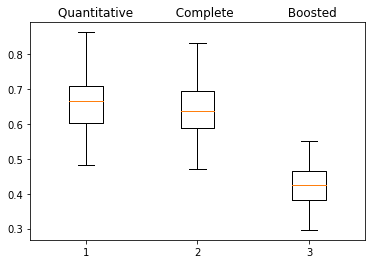

la moyenne des précisions du model 1 est de :  0.6592811991934923
la moyenne des précisions du model 2 est de :  0.6375301964544507
la moyenne des précisions du model 3 est de :  0.426857744638302


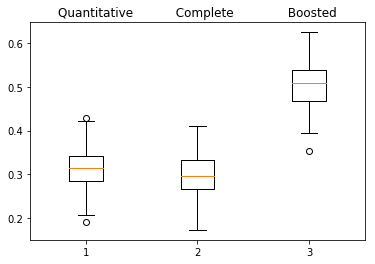

la moyenne des recall du model 1 est de :  0.314913927804282
la moyenne des recall du model 2 est de :  0.29946938582702975
la moyenne des recall du model 3 est de :  0.5037810467423849
la table des résulats du modèle quantitatif est la suivante: 
            predicted false  predicted true
real false           447.84            9.07
real true             37.78           17.31
la table des résulats du modèle complet est la suivante: 
            predicted false  predicted true
real false           447.41            9.50
real true             38.64           16.45
la table des résulats du modèle boosted est la suivante: 
            predicted false  predicted true
real false           419.29           37.62
real true             27.43           27.66
L'importance de chaque  variable peut être observée sur ce shéma : 


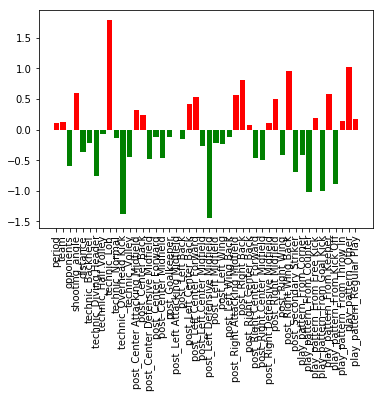

La variable la plus importante dans cette régression est donc : 
technic_Lob


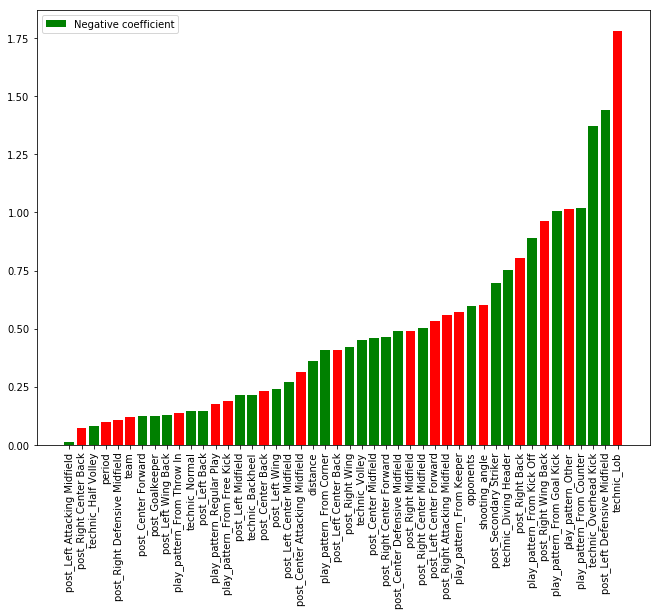

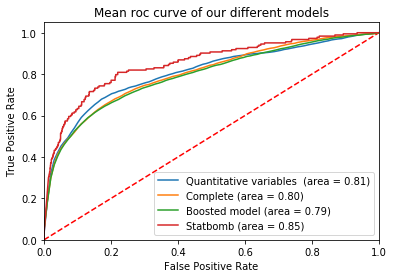

In [689]:
dfapprentissage=df[['period','team','opponents','shooting_angle','distance','technic','post','play_pattern','goal']]
index,coef3=TestS(dfapprentissage,100)

## D) Conclusions

On peut s'interroger sur la qualité de nos résultats précédents. Les scores sont tous environ les mêmes. Les buts étant très rares par rapport au nombre de tirs, même en prédisant 100% de "non buts", on obtiendrait un score extrêmement bon. Pour tester la robustesse de notre méthode, nous avons donc artificiellement ajouté des buts dans le dataframe : on appelle cela le suréchantillonnage. Le score de la prédiction est moins précis. Cependant ce qui nous intéresse est de prédire des buts quitte à en prédire trop. Nous sommes donc contents de nos résultats car notre modèle boosted a un meilleur recall.

Le fait de rajouter des variables qualitatives n'a pas beaucoup changé la précision, le recall et le score de nos buts qui diminuent seulement très peu. On se demande si cela valait la peine de les rajouter. On se demande aussi si dans le modèle boosted il valait mieux rajouter des buts dans l'apprentissages du modèle complet ou du modèle quantitatif. Cette hypothèse sera testée en annexe et nous confortera dans notre choix de duppliquer les buits à partir du modèle complet.

## E) Annexes 

In [690]:
coef3=coef3[5:]

In [691]:
normalised_coef3 = (coef3 - min(coef3)) / ( max(coef3) - min(coef3) )

On met toutes nos valeurs de coef (correspondant à des variables qualitatives) entre 0 et 1 pour pouvoir comparer avec les probas de marquer pour chaque variable qualitative de la partie exploratoire. Ce travail de comparaison est fait dans notre rapport.

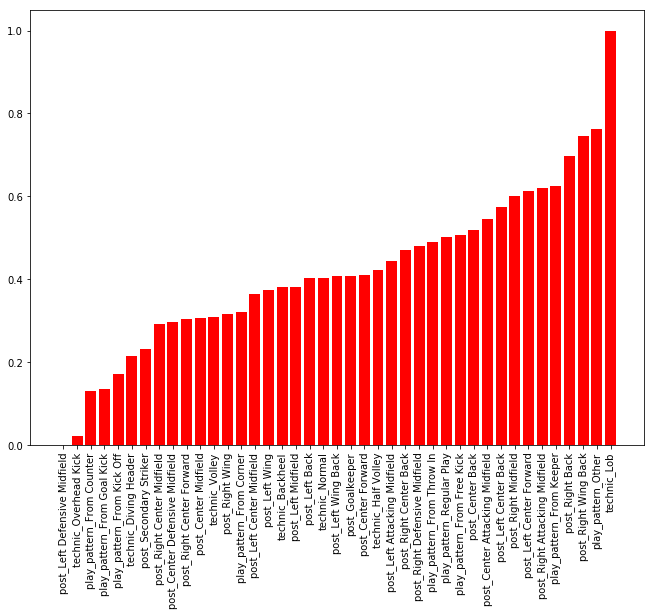

In [692]:
plt.figure(2,figsize=(11,8))
plt.bar(np.arange(len(normalised_coef3)),sort(normalised_coef3),color='red')
plt.xticks(range(len(normalised_coef3)), X_train3.columns[5:][np.argsort(normalised_coef3)],rotation = 90)
plt.show()

In [694]:
def TestSmodelboostedquanti(dataframe,k):

    listescore1=[]
    listescore2=[]
    listescore3=[]
    coef1=[]
    coef2=[]
    coef3=[]
    recall1=[]
    recall2=[]
    recall3=[]
    precision1=[]
    precision2=[]
    precision3=[]

    listeaire1=[]
    listefpr1=[]
    listetpr1=[]
    
    listeaire2=[]
    listefpr2=[]
    listetpr2=[]
    
    listeaire3=[]
    listefpr3=[]
    listetpr3=[]
    
    listefn1=[]
    listetn1=[]
    listetp1=[]
    listefp1=[]
    
    listefn2=[]
    listetn2=[]
    listetp2=[]
    listefp2=[]
    
    listefn3=[]
    listetn3=[]
    listetp3=[]
    listefp3=[]
    
    
    xs = np.linspace(0, 1, 100)
    for i in range(k): 
    
        reglog1=lm.LogisticRegression(penalty='l1')
        reglog2=lm.LogisticRegression(penalty='l2')
        reglog3=lm.LogisticRegression(penalty='l2')
        dataframe=pd.get_dummies(dataframe)
        X_train, X_test, y_train, y_test = train_test_split( dataframe[dataframe.columns.drop('goal')], dataframe['goal'], test_size=0.3, random_state=i)
        X_train1=X_train[['period','team','opponents','shooting_angle','distance']]
        X_test1=X_test[['period','team','opponents','shooting_angle','distance']]
        X_test2=X_test
        X_train2=X_train
    
        X_train3=X_train[['period','team','opponents','shooting_angle','distance']]
        X_test3=X_test[['period','team','opponents','shooting_angle','distance']]
    

        Train=pd.concat([X_train3,y_train],axis=1)
        X_traingoal=Train[Train.columns.drop('goal')][Train['goal']==True]
        y_traingoal=Train[Train['goal']==True]['goal']
        X_train3=pd.concat([X_train3,X_traingoal,X_traingoal,X_traingoal],axis=0)
        y_train3=pd.concat([y_train,y_traingoal,y_traingoal,y_traingoal],axis=0)
        
        fitter1= reglog1.fit(X_train1,y_train) 
        fitter2= reglog2.fit(X_train2,y_train) 
        fitter3= reglog3.fit(X_train3,y_train3) 
        
        listescore1+=[fitter1.score(X_test1,y_test)]
        listescore2+=[fitter2.score(X_test2,y_test)]
        listescore3+=[fitter3.score(X_test3,y_test)]
    
        prediction1=fitter1.predict (X_test1) 
        prediction2=fitter2.predict (X_test2)       
        prediction3=fitter3.predict (X_test3)
        
        probas1=fitter1.predict_proba(X_test1)[:,1]
        fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1)
        listeaire1+=[auc(fpr1,tpr1)]
        
       
        probas2=fitter2.predict_proba(X_test2)[:,1]
        fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2)
        listeaire2+=[auc(fpr2,tpr2)]
        
        probas3=fitter3.predict_proba(X_test3)[:,1]
        fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3)
        listeaire3+=[auc(fpr3,tpr3)]
        
        tn1, fp1, fn1, tp1 = confusion_matrix(y_test, prediction1).ravel()
        listetn1+=[tn1]
        listefp1+=[fp1]
        listefn1+=[fn1]
        listetp1+=[tp1]
        
        conf1 = confusion_matrix(y_test, prediction1)
        cf1 = pd.DataFrame(conf1, columns=['predicted ' + _ for _ in [ "false","true"]])
        cf1.index = ['real ' + _ for _ in ["false","true"]]

        tn2, fp2, fn2, tp2 = confusion_matrix(y_test, prediction2).ravel()
        listetn2+=[tn2]
        listefp2+=[fp2]
        listefn2+=[fn2]
        listetp2+=[tp2]
        
        conf2 = confusion_matrix(y_test, prediction2)
        cf2= pd.DataFrame(conf2, columns=['predicted ' + _ for _ in [ "false","true"]])
        cf2.index = ['real ' + _ for _ in ["false","true"]]
        
        tn3, fp3, fn3, tp3 = confusion_matrix(y_test, prediction3).ravel()
        listetn3+=[tn3]
        listefp3+=[fp3]
        listefn3+=[fn3]
        listetp3+=[tp3]
        
        conf3 = confusion_matrix(y_test, prediction3)
        cf3 = pd.DataFrame(conf3, columns=['predicted ' + _ for _ in [ "false","true"]])
        cf3.index = ['real ' + _ for _ in ["false","true"]]
        
        
        recall1+=[metrics.recall_score(y_test,prediction1)]
        recall2+=[metrics.recall_score(y_test,prediction2)]
        recall3+=[metrics.recall_score(y_test,prediction3)]
        precision1+=[metrics.precision_score(y_test,prediction1)]
        precision2+=[metrics.precision_score(y_test,prediction2)]
        precision3+=[metrics.precision_score(y_test,prediction3)]
        
        spl1=interp1d(fpr1,tpr1)
        spl2=interp1d(fpr2,tpr2)
        spl3=interp1d(fpr3,tpr3)


        if i==0:
            coef1=fitter1.coef_[0]
            coef2=fitter2.coef_[0]
            coef3=fitter3.coef_[0]
            listetpr1=spl1(xs)
            listetpr2=spl2(xs)
            listetpr3=spl3(xs)
        else:

            coef1=[coef1[k]+fitter1.coef_[0][k] for k in range(len(coef1))]
            coef2=[coef2[k]+fitter2.coef_[0][k] for k in range(len(coef2))]
            coef3=[coef3[k]+fitter3.coef_[0][k] for k in range(len(coef3))]
            listetpr1=[listetpr1[k]+spl1(xs)[k] for k in range(len(listetpr1))]
            listetpr2=[listetpr2[k]+spl2(xs)[k] for k in range(len(listetpr2))]
            listetpr3=[listetpr3[k]+spl3(xs)[k] for k in range(len(listetpr3))]
            
            
    recal1=mean(recall1)
    recal2=mean(recall2)
    recal3=mean(recall3)
    prec1=mean(precision1)
    prec2=mean(precision2)
    prec3=mean(precision3)
    boxplot([listescore1,listescore2,listescore3])
    plt.title("Quantitative           Complete              Boosted")
    show()
    print("La moyenne des scores pour le modèle 1 est de : ", mean(listescore1))
    print("La moyenne des scores pour le modèle 2 est de : ", mean(listescore2))
    print("La moyenne des scores pour le modèle 3 est de : ", mean(listescore3))
    
    boxplot([precision1,precision2,precision3])
    plt.title("Quantitative           Complete              Boosted")
    show()
    print("la moyenne des précisions du model 1 est de : ", prec1)
    print("la moyenne des précisions du model 2 est de : ", prec2)
    print("la moyenne des précisions du model 3 est de : ", prec3)
    boxplot([recall1,recall2,recall3])
    plt.title("Quantitative           Complete              Boosted")
    show()
    print("la moyenne des recall du model 1 est de : ", recal1)
    print("la moyenne des recall du model 2 est de : ", recal2)
    print("la moyenne des recall du model 3 est de : ", recal3)
    
    tn3=mean(listetn3)
    fp3=mean(listefp3)
    fn3=mean(listefn3)
    tp3=mean(listetp3)
    conf3 = np.array([tn3,fp3,fn3,tp3]).reshape((2,2))
    cf3 = pd.DataFrame(conf3, columns=['predicted ' + _ for _ in [ "false","true"]])
    cf3.index = ['real ' + _ for _ in ["false","true"]]
        
    
    tn2=mean(listetn2)
    fp2=mean(listefp2)
    fn2=mean(listefn2)
    tp2=mean(listetp2)
    conf2 = np.array([tn2,fp2,fn2,tp2]).reshape((2,2))
    cf2 = pd.DataFrame(conf2, columns=['predicted ' + _ for _ in [ "false","true"]])
    cf2.index = ['real ' + _ for _ in ["false","true"]]
        
    
    tn1=mean(listetn1)
    fp1=mean(listefp1)
    fn1=mean(listefn1)
    tp1=mean(listetp1)
    conf1 = np.array([tn1,fp1,fn1,tp1]).reshape((2,2))
    cf1 = pd.DataFrame(conf1, columns=['predicted ' + _ for _ in [ "false","true"]])
    cf1.index = ['real ' + _ for _ in ["false","true"]]
        

        
    coef1=[coef1[l]/k for l in range(len(coef1))]
    coef2=[coef2[l]/k for l in range(len(coef2))]
    coef3=[coef3[l]/k for l in range(len(coef3))]
    print("la table des résulats du modèle quantitatif est la suivante: ")
    print(cf1)
    print("la table des résulats du modèle complet est la suivante: ")
    print(cf2)
    print("la table des résulats du modèle boosted est la suivante: ")
    print(cf3)
    

    
   
    
    print("L'importance de chaque  variable peut être observée sur ce shéma : ")
    plt.figure(1)
    plt.bar(np.arange(len(coef3)),coef3,color=['red' if coef3[k]>=0 else 'green' for k in arange(len(coef3))])
    plt.xticks(range(len(coef3)), X_train3.columns,rotation = 90)
    plt.show()
    
    print("La variable la plus importante dans cette régression est donc : ")
    print(X_train3.columns[abs(np.array(coef3)).argmax()])
    
    index=np.argsort(np.abs(np.array(coef3)))
    plt.figure(2,figsize=(11,8))
    plt.bar(np.arange(len(coef3)),np.abs(np.array(coef3)[index]),color=['red' if coef3[k]>=0 else 'green' for k in index])
    plt.xticks(range(len(coef3)), X_train3.columns[index],rotation = 90)
    plt.legend(['Negative coefficient', 'Positive coefficient'],loc=2)
    plt.show()
            
    dataframe["goal_statbomb"]=[1 if k>0.5 else 0 for k in df["statbomb"]]
    framecomparaisonstatbomb=pd.concat([df["goal_statbomb"],df["statbomb"]], axis=1, join='inner')

    aire4 = roc_auc_score(dataframe['goal'],framecomparaisonstatbomb["goal_statbomb"])
    fpr4, tpr4, thresholds4 = roc_curve(dataframe['goal'],framecomparaisonstatbomb["statbomb"])
    
    listetpr1=[listetpr1[l]/k for l in range(len(listetpr1))]
    listetpr2=[listetpr2[l]/k for l in range(len(listetpr2))]
    listetpr3=[listetpr3[l]/k for l in range(len(listetpr3))]
    plt.figure()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Mean roc curve of our different models')
    plt.plot(xs, listetpr1, label='Quantitative variables  (area = %0.2f)' % mean(listeaire1))
    plt.plot(xs, listetpr2, label='Complete (area = %0.2f)' % mean(listeaire2))
    plt.plot(xs, listetpr3, label='Boosted model (area = %0.2f)' % mean(listeaire3))
    plt.plot(fpr4, tpr4, label='Statbomb (area = %0.2f)' % auc(fpr4,tpr4))
    
    plt.legend(loc="lower right")
    plt.show()
    

    return index,coef3

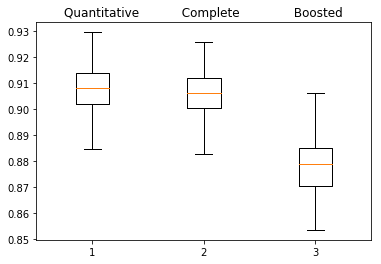

La moyenne des scores pour le modèle 1 est de :  0.90849609375
La moyenne des scores pour le modèle 2 est de :  0.9059765625
La moyenne des scores pour le modèle 3 est de :  0.87845703125


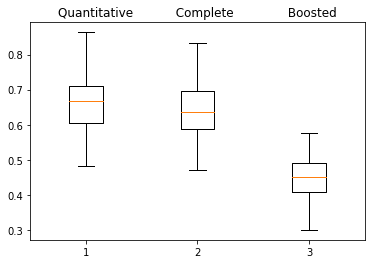

la moyenne des précisions du model 1 est de :  0.6592811991934923
la moyenne des précisions du model 2 est de :  0.6375301964544507
la moyenne des précisions du model 3 est de :  0.44612181733359274


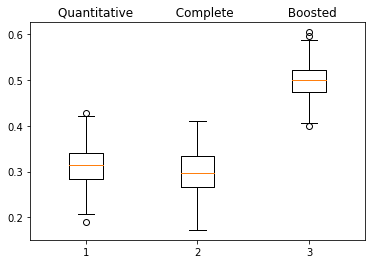

la moyenne des recall du model 1 est de :  0.314913927804282
la moyenne des recall du model 2 est de :  0.29946938582702975
la moyenne des recall du model 3 est de :  0.49703129581976435
la table des résulats du modèle quantitatif est la suivante: 
            predicted false  predicted true
real false           447.84            9.07
real true             37.78           17.31
la table des résulats du modèle complet est la suivante: 
            predicted false  predicted true
real false           447.41            9.50
real true             38.64           16.45
la table des résulats du modèle boosted est la suivante: 
            predicted false  predicted true
real false           422.45           34.46
real true             27.77           27.32
L'importance de chaque  variable peut être observée sur ce shéma : 


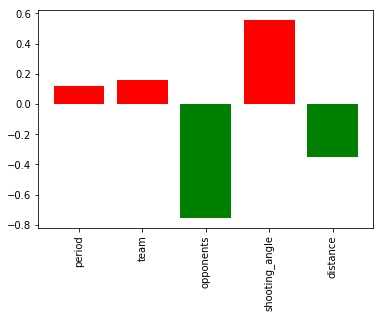

La variable la plus importante dans cette régression est donc : 
opponents


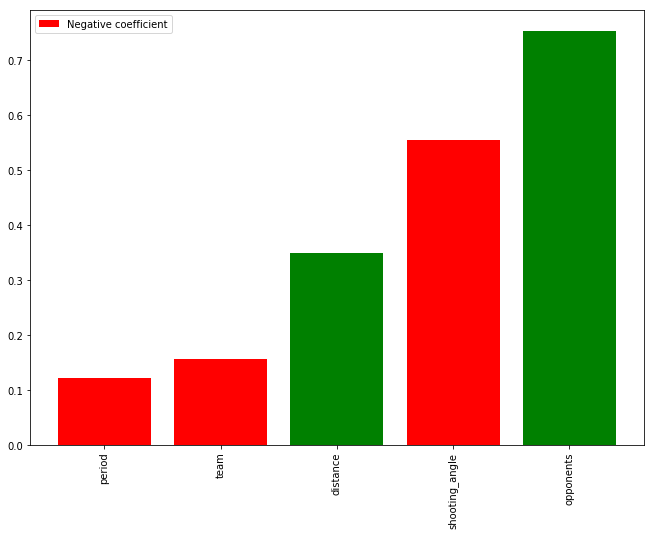

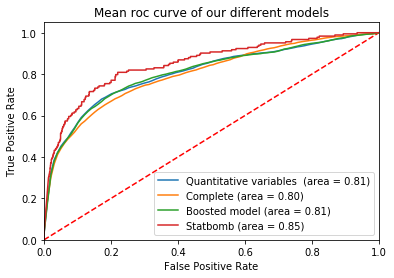

In [695]:
dfapprentissage=df[['period','team','opponents','shooting_angle','distance','technic','post','play_pattern','goal']]
index,coef3=TestSmodelboostedquanti(dfapprentissage,100)

On observe un recall moins important que dans le cadre d'un model boosted avec toutes les variables. Cela nous conforte dans nos précédents choix.